In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('datasets/index2018.csv')

### checkpointing

In [3]:
data=df.copy()


data.date=pd.to_datetime(data.date,dayfirst=True)

data.head()

data.set_index(data.date,inplace=True)

del data['date']

### checkpointing for using only data for spx

In [ ]:
data_spx=data.spx.copy()

## Setting the desired frequency 

In [10]:
data_spx=data_spx.asfreq('b')

In [11]:
data_spx.isna().sum()

8

As we have the missing values of price in the business days, we need to fill it with appropriate values

## Filling the missing values

In [12]:
data_spx=data_spx.fillna(method='ffill')

In [13]:
data_spx.isna().sum()

0

## QQ model

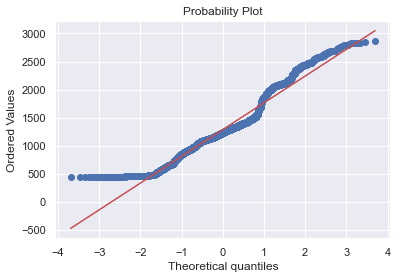

In [14]:
import scipy.stats

scipy.stats.probplot(data_spx, plot=plt)
plt.plot()
plt.show()

The SPX price are not normally distributes as it doesnot coinsides the 45 degree line.

## Plotting the SPX price and returns

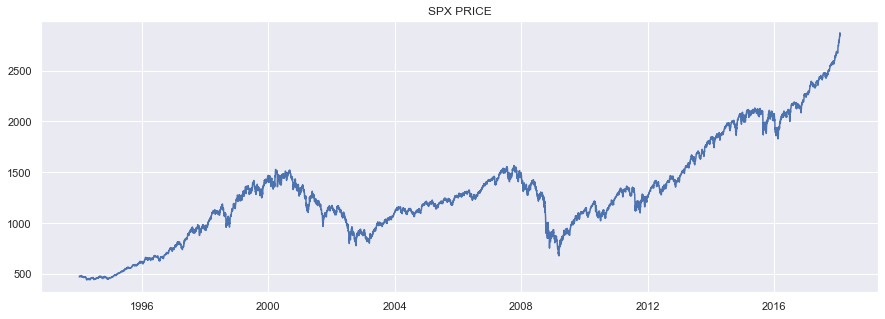

In [15]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(data_spx)
plt.title('SPX PRICE')
plt.show()

In [16]:
spx_returns=data_spx.pct_change()

spx_returns=spx_returns.dropna()

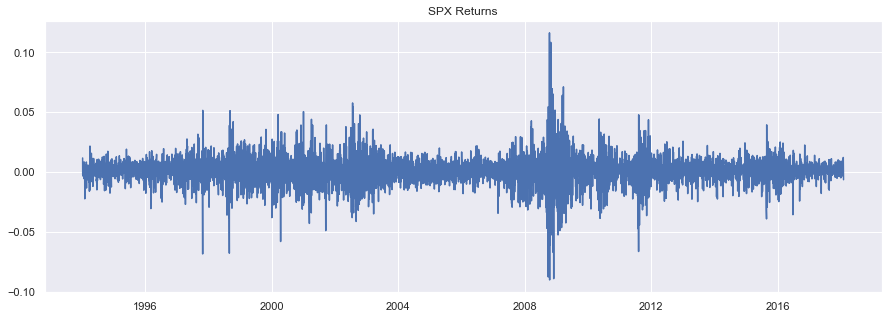

In [17]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(spx_returns)
plt.title('SPX Returns')
plt.show()

so, what is the SPX stock price and SPX stock returns, is it stationary or not. So for know it we need to do Dickery-Fuller test.

The Null hypothesis for the test is that the given series is not a stationary series.

### Or, simply we can also simulate the white noise from the SPX price

In [18]:
wn=np.random.normal(loc=np.mean(data_spx),scale=np.std(data_spx),size=len(data.spx))

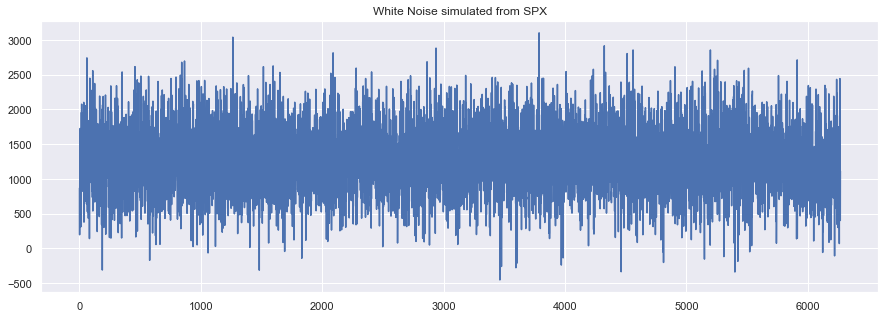

In [19]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(wn)
plt.title('White Noise simulated from SPX')
plt.show()

## Dickey-Fuller Test

In [20]:
#importing required module
import statsmodels.tsa.stattools as sts

In [21]:
sts.adfuller(data_spx)

(1.1194986381728411,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

 From the test we have p value=0.9953 , which is significanly very very high. So, we cannot reject our null hypothesis that the series is a non-stationary series.
 
 Therefore the series is a non-stationary series.
 Simple, we can also conculde that the series is a random walk as non-stationary series is a random walk.

In [22]:
sts.adfuller(spx_returns)

(-14.173447277641253,
 1.9848251568210003e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 -38260.583936373085)

From the test we have p-value equal to approzimately 0.So, we can easily reject Null hypothesis that the series is non a stationary. Hence the series is stationary series.

So, we can conculde Stock returns are stationary series.
Simple, we can also say that the series is White Noise, as it is a stationary series.

## Seasonality

Certain trend appers on a cyclical basis.
To test the seasonality we do Decomposition, so we split the observation into 2 effects:
i: Trend

ii: Seasonal

III: Residual

#### "Naive Decomposition"
Whih the naive decomposition we expect a linear replationship between 3 parts and the observed time series.

Two main approaches to "Naive" decomposition are:

i: Additive approach 
    observed=trend+seasonal+residual
    
    
ii: Multiplicative approach
    observed=trend * seasonal * residual

In [23]:
#Importing the necessary package
from statsmodels.tsa.seasonal import seasonal_decompose

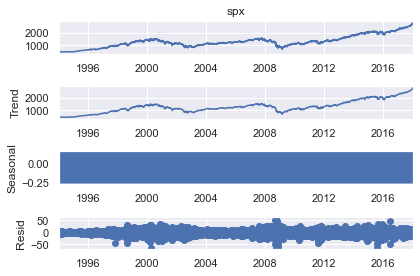

In [24]:
s_dec_additive=seasonal_decompose(data_spx,model="additive")
s_dec_additive.plot()
plt.show()

From here we can see their is no seasonality in the stock price of SPX

## Autocorelation

In [25]:
#importing the required package
import statsmodels.graphics.tsaplots as sgt

#### ACF AND PACF for SPX Price(non-stationary series)

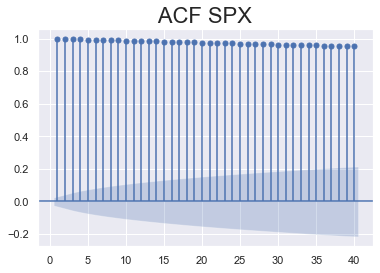

In [26]:
sgt.plot_acf(data_spx,lags=40,zero=False)
plt.title(" ACF SPX ",size=22)
plt.show()

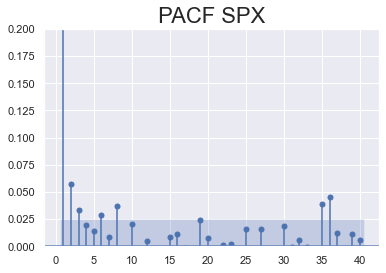

In [27]:
sgt.plot_pacf(data_spx,lags=40,zero=False,method=('ols'))
plt.title(" PACF SPX ",size=22)
plt.ylim(0,0.2)
plt.show()

#### ACF and PACF for SPX returns( stationary series)

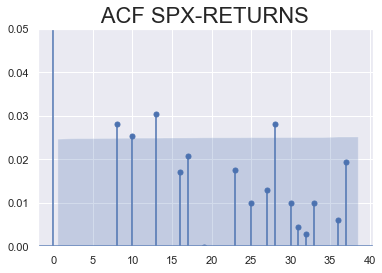

In [28]:
sgt.plot_acf(spx_returns)
plt.title(" ACF SPX-RETURNS ",size=22)
plt.ylim(0,0.05)
plt.show()

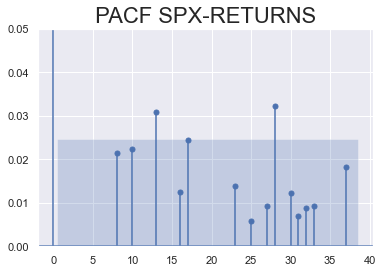

In [29]:
sgt.plot_pacf(spx_returns)
plt.title(" PACF SPX-RETURNS ",size=22)
plt.ylim(0,0.05)
plt.show()

## AR MODEL

In [30]:
#importing necessary models
from statsmodels.tsa.arima_model import ARMA

#### AR(1) 

In [31]:
model_ar_1=ARMA(data_spx,order=(1,0))
result_ar_1=model_ar_1.fit()
result_ar_1.summary()

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -25274.743
Method:                       css-mle   S.D. of innovations             13.557
Date:                Wed, 19 May 2021   AIC                          50555.486
Time:                        11:56:46   BIC                          50575.720
Sample:                    01-07-1994   HQIC                         50562.496
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6934   1034.111      1.246      0.213    -738.127    3315.514
ar.L1.spx      0.9999      0.000   8129.702      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Here , the null hypothesis is the the value of coefficient is 0. so to reject the null hypothesis, the p value should be less then 0.05 significance level.
Here as the p-value is 0.0, we can reject the null hypothesis. So we can say the coefficient is significantly different from 0.

In [32]:
model_ar_2=ARMA(data_spx,order=(2,0))
result_ar_2=model_ar_2.fit()
result_ar_2.summary()

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -25264.882
Method:                       css-mle   S.D. of innovations             13.536
Date:                Wed, 19 May 2021   AIC                          50537.763
Time:                        11:56:46   BIC                          50564.742
Sample:                    01-07-1994   HQIC                         50547.111
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6653   1072.637      1.201      0.230    -813.665    3390.996
ar.L1.spx      0.9439      0.001    943.003      0.000       0.942       0.946
ar.L2.spx      0.0560      0.001     55.969      0.000       0.054       0.058
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
AR.2          -17.8477           +0.0000j           17.8477            0.5000
-----------------------------------------------------------------------------
"""

In [33]:
model_ar_3=ARMA(data_spx,order=(3,0))
result_ar_3=model_ar_3.fit()
result_ar_3.summary()

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -25261.700
Method:                       css-mle   S.D. of innovations             13.529
Date:                Wed, 19 May 2021   AIC                          50533.400
Time:                        11:56:47   BIC                          50567.123
Sample:                    01-07-1994   HQIC                         50545.085
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6557   1091.416      1.181      0.238    -850.480    3427.791
ar.L1.spx      0.9421      0.001   1040.427      0.000       0.940       0.944
ar.L2.spx      0.0259      0.013      2.054      0.040       0.001       0.051
ar.L3.spx      0.0319      0.013      2.527      0.012       0.007       0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           -0.0000j            1.0001           -0.0000
AR.2           -0.9074           -5.5291j            5.6031           -0.2759
AR.3           -0.9074           +5.5291j            5.6031            0.2759
-----------------------------------------------------------------------------
"""

## LLR Test

In [34]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1,mod_2,DF=1):
    #Here, DF is the Degree of freedom, the degree of freedom between AR(1) and AR(2) is 1.
    
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [35]:
LLR_test(model_ar_1,model_ar_2)

0.0

In [36]:
LLR_test(model_ar_2,model_ar_3)

0.012

In [37]:
model_ar_4=ARMA(data_spx,order=(4,0))
result_ar_4=model_ar_4.fit()
print(result_ar_4.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_3,model_ar_4)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -25260.640
Method:                       css-mle   S.D. of innovations             13.527
Date:                Wed, 19 May 2021   AIC                          50533.281
Time:                        11:56:50   BIC                          50573.749
Sample:                    01-07-1994   HQIC                         50547.302
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6553   1101.681      1.170      0.242    -870.600    3447.911
ar.L1.spx      0.9415      0.001   1100.515      0.000       0.940       0.943
ar.L2.spx      0.0255      0.013      2.015      0.0

In [38]:
model_ar_5=ARMA(data_spx,order=(5,0))
result_ar_5=model_ar_5.fit()
print(result_ar_5.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_4,model_ar_5)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -25260.128
Method:                       css-mle   S.D. of innovations             13.526
Date:                Wed, 19 May 2021   AIC                          50534.257
Time:                        11:56:52   BIC                          50581.469
Sample:                    01-07-1994   HQIC                         50550.615
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6559   1108.511      1.163      0.245    -883.986    3461.297
ar.L1.spx      0.9413      0.001   1143.751      0.000       0.940       0.943
ar.L2.spx      0.0253      0.013      2.000      0.0

In [39]:
model_ar_6=ARMA(data_spx,order=(6,0))
result_ar_6=model_ar_6.fit()
print(result_ar_6.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_5,model_ar_6)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(6, 0)   Log Likelihood              -25257.738
Method:                       css-mle   S.D. of innovations             13.521
Date:                Wed, 19 May 2021   AIC                          50531.475
Time:                        11:56:56   BIC                          50585.432
Sample:                    01-07-1994   HQIC                         50550.170
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6558   1122.606      1.148      0.251    -911.611    3488.923
ar.L1.spx      0.9410      0.001   1242.203      0.000       0.939       0.942
ar.L2.spx      0.0251      0.013      1.986      0.0

In [40]:
model_ar_7=ARMA(data_spx,order=(7,0))
result_ar_7=model_ar_7.fit()
print(result_ar_7.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_6,model_ar_7)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(7, 0)   Log Likelihood              -25257.588
Method:                       css-mle   S.D. of innovations             13.520
Date:                Wed, 19 May 2021   AIC                          50533.175
Time:                        11:57:04   BIC                          50593.877
Sample:                    01-07-1994   HQIC                         50554.207
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6575   1126.448      1.144      0.253    -919.140    3496.455
ar.L1.spx      0.9408      0.001   1269.550      0.000       0.939       0.942
ar.L2.spx      0.0252      0.013      1.993      0.0

In [41]:
model_ar_8=ARMA(data_spx,order=(8,0))
result_ar_8=model_ar_8.fit()
print(result_ar_8.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_7,model_ar_8)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess))

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(8, 0)   Log Likelihood              -25257.412
Method:                       css-mle   S.D. of innovations             13.511
Date:                Wed, 19 May 2021   AIC                          50534.823
Time:                        11:57:14   BIC                          50602.270
Sample:                    01-07-1994   HQIC                         50558.192
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6580        nan        nan        nan         nan         nan
ar.L1.spx      0.9404   6.91e-06   1.36e+05      0.000       0.940       0.940
ar.L2.spx      0.0245      0.013      1.925      0.0

In [42]:
model_ar_9=ARMA(data_spx,order=(9,0))
result_ar_9=model_ar_9.fit()
print(result_ar_9.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_8,model_ar_9)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(9, 0)   Log Likelihood              -25252.789
Method:                       css-mle   S.D. of innovations             13.510
Date:                Wed, 19 May 2021   AIC                          50527.578
Time:                        11:57:28   BIC                          50601.769
Sample:                    01-07-1994   HQIC                         50553.283
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6579   1134.076      1.136      0.256    -934.090    3511.406
ar.L1.spx      0.9411      0.001   1336.786      0.000       0.940       0.943
ar.L2.spx      0.0240      0.013      1.898      0.0

In [43]:
model_ar_10=ARMA(data_spx,order=(10,0))
result_ar_10=model_ar_10.fit()
print(result_ar_10.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_9,model_ar_10)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess))

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                    ARMA(10, 0)   Log Likelihood              -25255.364
Method:                       css-mle   S.D. of innovations             13.506
Date:                Wed, 19 May 2021   AIC                          50534.729
Time:                        11:57:52   BIC                          50615.664
Sample:                    01-07-1994   HQIC                         50562.771
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.6586        nan        nan        nan         nan         nan
ar.L1.spx      0.9415   6.92e-06   1.36e+05      0.000       0.942       0.942
ar.L2.spx      0.0230      0.013      1.834      0.0

In [44]:
print("\n LLR test p-value="+str(LLR_test(model_ar_1,model_ar_6,5)))


 LLR test p-value=0.0


In [45]:
print("\n LLR test p-value="+str(LLR_test(model_ar_1,model_ar_7,6)))


 LLR test p-value=0.0


In [46]:
print("\n LLR test p-value="+str(LLR_test(model_ar_1,model_ar_8,7)))


 LLR test p-value=0.0


In [47]:
print("\n LLR test p-value="+str(LLR_test(model_ar_1,model_ar_9,8)))


 LLR test p-value=0.0


In [48]:
print("\n LLR test p-value="+str(LLR_test(model_ar_1,model_ar_10,9)))


 LLR test p-value=0.0


#### Looking at all the stats , AR(9) would be good for our model, Now lets predict the price according to AR(6) model.

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


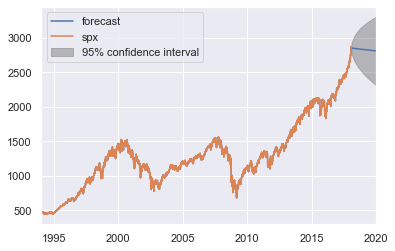

In [49]:
ar_9=ARMA(data_spx,order=(9,0))
res_ar_9=ar_9.fit()
res_ar_9.plot_predict(start=0,end='2020')
plt.show()

#### When we use AR model to predict non-stationary series, the more lags we introduct the better our model becomes,
ie. AR(N+1)>AR(N)

#### So, to avoid such issues, we use use AR models to predict Stationary series.
So, instead of using stock price in prediction we use stock return which is a stationary series data.

In [50]:
model_ar_1=ARMA(spx_returns,order=(1,0))
res_ar_1=model_ar_1.fit()
print(res_ar_1.summary())


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood               19234.853
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38463.706
Time:                        11:58:43   BIC                         -38443.472
Sample:                    01-10-1994   HQIC                        -38456.695
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.632      0.009    8.97e-05       0.001
ar.L1.spx     -0.0670      0.013     -5.321      0.000      -0.092      -0.042
                                    Roots           

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [51]:
model_ar_2=ARMA(spx_returns,order=(2,0))
res_ar_2=model_ar_2.fit()
print(res_ar_2.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_1,model_ar_2)))


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood               19240.078
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38472.157
Time:                        11:58:43   BIC                         -38445.179
Sample:                    01-10-1994   HQIC                        -38462.809
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.741      0.006       0.000       0.001
ar.L1.spx     -0.0698      0.013     -5.530      0.000      -0.094      -0.045
ar.L2.spx     -0.0408      0.013     -3.236      0.0

In [52]:
model_ar_3=ARMA(spx_returns,order=(3,0))
res_ar_3=model_ar_3.fit()
print(res_ar_3.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_2,model_ar_3)))


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               19240.473
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38470.945
Time:                        11:58:43   BIC                         -38437.223
Sample:                    01-10-1994   HQIC                        -38459.261
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.771      0.006       0.000       0.001
ar.L1.spx     -0.0702      0.013     -5.562      0.000      -0.095      -0.045
ar.L2.spx     -0.0416      0.013     -3.290      0.0

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)



 LLR test p-value=0.375


In [53]:
model_ar_4=ARMA(spx_returns,order=(4,0))
res_ar_4=model_ar_4.fit()
print(res_ar_4.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_3,model_ar_4)))


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(4, 0)   Log Likelihood               19241.029
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38470.058
Time:                        11:58:44   BIC                         -38429.591
Sample:                    01-10-1994   HQIC                        -38456.037
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.808      0.005       0.000       0.001
ar.L1.spx     -0.0703      0.013     -5.573      0.000      -0.095      -0.046
ar.L2.spx     -0.0421      0.013     -3.330      0.0

In [54]:
model_ar_5=ARMA(spx_returns,order=(5,0))
res_ar_5=model_ar_5.fit()
print(res_ar_5.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_4,model_ar_5)))


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(5, 0)   Log Likelihood               19245.227
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38476.454
Time:                        11:58:44   BIC                         -38429.242
Sample:                    01-10-1994   HQIC                        -38460.096
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.912      0.004       0.000       0.001
ar.L1.spx     -0.0708      0.013     -5.615      0.000      -0.096      -0.046
ar.L2.spx     -0.0426      0.013     -3.366      0.0

In [55]:
model_ar_6=ARMA(spx_returns,order=(6,0))
res_ar_6=model_ar_6.fit()
print(res_ar_6.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_5,model_ar_6)))


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood               19245.937
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38475.875
Time:                        11:58:45   BIC                         -38421.919
Sample:                    01-10-1994   HQIC                        -38457.180
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.956      0.003       0.000       0.001
ar.L1.spx     -0.0714      0.013     -5.656      0.000      -0.096      -0.047
ar.L2.spx     -0.0428      0.013     -3.386      0.0

In [56]:
model_ar_7=ARMA(spx_returns,order=(7,0))
res_ar_7=model_ar_7.fit()
print(res_ar_7.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_6,model_ar_7)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(7, 0)   Log Likelihood               19250.494
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38482.989
Time:                        11:58:47   BIC                         -38422.288
Sample:                    01-10-1994   HQIC                        -38461.957
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.070      0.002       0.000       0.001
ar.L1.spx     -0.0719      0.013     -5.704      0.000      -0.097      -0.047
ar.L2.spx     -0.0442      0.013     -3.499      0.0

In [57]:
model_ar_11=ARMA(spx_returns,order=(11,0))
res_ar_11=model_ar_11.fit()
print(res_ar_11.summary())


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                    ARMA(11, 0)   Log Likelihood               19254.844
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38483.688
Time:                        11:58:51   BIC                         -38396.009
Sample:                    01-10-1994   HQIC                        -38453.309
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.003      0.003       0.000       0.001
ar.L1.spx     -0.0702      0.013     -5.561      0.000      -0.095      -0.045
ar.L2.spx     -0.0451      0.013     -3.564      0.0

In [58]:
model_ar_12=ARMA(spx_returns,order=(12,0))
res_ar_12=model_ar_12.fit()
print(res_ar_12.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_11,model_ar_12)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                    ARMA(12, 0)   Log Likelihood               19254.921
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38481.843
Time:                        11:58:56   BIC                         -38387.420
Sample:                    01-10-1994   HQIC                        -38449.127
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.018      0.003       0.000       0.001
ar.L1.spx     -0.0702      0.013     -5.562      0.000      -0.095      -0.045
ar.L2.spx     -0.0450      0.013     -3.554      0.0

In [59]:
model_ar_13=ARMA(spx_returns,order=(13,0))
res_ar_13=model_ar_13.fit()
print(res_ar_13.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_12,model_ar_13)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                    ARMA(13, 0)   Log Likelihood               19257.885
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38485.771
Time:                        11:59:09   BIC                         -38384.603
Sample:                    01-10-1994   HQIC                        -38450.718
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.928      0.003       0.000       0.001
ar.L1.spx     -0.0701      0.013     -5.552      0.000      -0.095      -0.045
ar.L2.spx     -0.0449      0.013     -3.552      0.0

In [60]:
model_ar_14=ARMA(spx_returns,order=(14,0))
res_ar_14=model_ar_14.fit()
print(res_ar_14.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_13,model_ar_14)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                    ARMA(14, 0)   Log Likelihood               19258.189
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38484.378
Time:                        11:59:28   BIC                         -38376.466
Sample:                    01-10-1994   HQIC                        -38446.988
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.957      0.003       0.000       0.001
ar.L1.spx     -0.0698      0.013     -5.526      0.000      -0.094      -0.045
ar.L2.spx     -0.0450      0.013     -3.554      0.0

In [62]:
model_ar_15=ARMA(spx_returns,order=(15,0))
res_ar_15=model_ar_15.fit()
print(res_ar_15.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_14,model_ar_15)))

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                    ARMA(15, 0)   Log Likelihood               19259.355
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38484.709
Time:                        12:00:45   BIC                         -38370.053
Sample:                    01-10-1994   HQIC                        -38444.983
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.013      0.003       0.000       0.001
ar.L1.spx     -0.0699      0.013     -5.542      0.000      -0.095      -0.045
ar.L2.spx     -0.0444      0.013     -3.508      0.0

Using ARMA(13,0) model is good as per the model fitting.

## Normalizing value

In [63]:
benchmark=spx_returns[0]

In [64]:
benchmark

0.011427963396467344

In [65]:
normalized_returns=[]

In [66]:
normalized_returns=spx_returns.div(benchmark).mul(100)

In [67]:
normalized_returns

date
1994-01-10    100.000000
1994-01-11    -20.989187
1994-01-12      0.738233
1994-01-13    -31.372275
1994-01-14     45.190459
                 ...    
2018-01-23     19.015408
2018-01-24     -4.889292
2018-01-25      5.270314
2018-01-26    103.599509
2018-01-29    -58.905946
Freq: B, Name: spx, Length: 6276, dtype: float64

In [68]:
sts.adfuller(normalized_returns)

(-14.173447277641223,
 1.9848251568212422e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 75036.80983902364)

So, the normalized returns is also stationary.

### Model Fitting

In [69]:
model_ar_1=ARMA(normalized_returns,order=(1,0))
res_ar_1=model_ar_1.fit()
print(res_ar_1.summary())


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood              -37731.534
Method:                       css-mle   S.D. of innovations             98.800
Date:                Wed, 19 May 2021   AIC                          75469.069
Time:                        12:01:16   BIC                          75489.302
Sample:                    01-10-1994   HQIC                         75476.079
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0751      1.169      2.631      0.009       0.784       5.366
ar.L1.spx     -0.0670      0.013     -5.320      0.000      -0.092      -0.042
                                    Roots           

C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [70]:
model_ar_2=ARMA(spx_returns,order=(2,0))
res_ar_2=model_ar_2.fit()
print(res_ar_2.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_1,model_ar_2)))


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood               19240.078
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38472.157
Time:                        12:01:16   BIC                         -38445.179
Sample:                    01-10-1994   HQIC                        -38462.809
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.741      0.006       0.000       0.001
ar.L1.spx     -0.0698      0.013     -5.530      0.000      -0.094      -0.045
ar.L2.spx     -0.0408      0.013     -3.236      0.0

In [71]:
model_ar_3=ARMA(spx_returns,order=(3,0))
res_ar_3=model_ar_3.fit()
print(res_ar_3.summary())
print("\n LLR test p-value="+str(LLR_test(model_ar_2,model_ar_3)))


C:\Users\lfc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               19240.473
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 19 May 2021   AIC                         -38470.945
Time:                        12:01:17   BIC                         -38437.223
Sample:                    01-10-1994   HQIC                        -38459.261
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.771      0.006       0.000       0.001
ar.L1.spx     -0.0702      0.013     -5.562      0.000      -0.095      -0.045
ar.L2.spx     -0.0416      0.013     -3.290      0.0

Since, we are getting the same coeffiecients after normalizing the returns vs the regular returns . So , whatever happens to 
the non-normalized returns same thing are reflected in normalized.
So, for this model it is not necessary to normalized the data

## Analysing the Residuals

In [72]:
residuals=res_ar_13.resid

In [73]:
residuals.mean()

2.727762807840976e-07

In [74]:
residuals.var()

0.0001265697266078185

In [75]:
sts.adfuller(residuals)

(-79.1827719349255,
 0.0,
 0,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 -38272.85373165787)

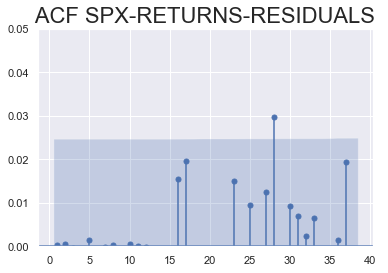

In [79]:
sgt.plot_acf(residuals,zero=False)
plt.title(" ACF SPX-RETURNS-RESIDUALS ",size=22)
plt.ylim(0,0.05)
plt.show()

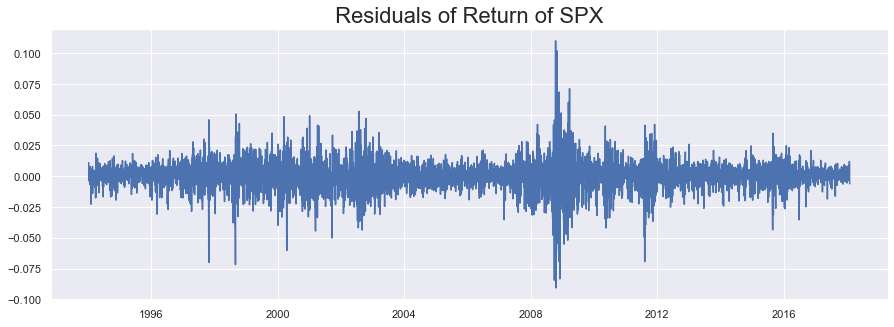

In [77]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(residuals)
plt.title(" Residuals of Return of SPX ",size=22)
plt.show()